In [1]:
import numpy as np

In [2]:
b = np.arange(24).reshape(2, 3, 4)
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [3]:
b[0, 0, 0]

0

In [4]:
b[:, 0, 0]

array([ 0, 12])

In [5]:
b[0]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
b[0, :, :] # 同じ効果

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [7]:
b[0, ...] # 上の簡易版

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [8]:
b[0, 1, ::2] # steps

array([4, 6])

In [9]:
b[..., 1]

array([[ 1,  5,  9],
       [13, 17, 21]])

In [10]:
b[:, 1]

array([[ 4,  5,  6,  7],
       [16, 17, 18, 19]])

In [11]:
b[0, ::-1, -1] # negative indices

array([11,  7,  3])

## Advanced indexing and index tricks

### Indexing with Arrays of Indices


In [12]:
a = np.arange(12) ** 2
i = np.array([1, 1, 3, 8, 5])
j = np.array([[3, 4], [9, 7]])

In [13]:
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [14]:
a[i]

array([ 1,  1,  9, 64, 25])

In [15]:
a[j]

array([[ 9, 16],
       [81, 49]])

In [16]:
palette = np.array([[0, 0, 0],        # 黒
                    [255, 0, 0],      # 赤
                    [0, 255, 0],      # 緑
                    [0, 0, 255],      # 青
                    [255, 255, 255]]) # 白

In [17]:
image = np.array([[0, 1, 2, 0],
                  [0, 3, 4, 0]])

In [18]:
palette[image]

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0, 255],
        [255, 255, 255],
        [  0,   0,   0]]])

In [19]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [20]:
i = np.array([[0, 1],
              [1, 2]])
j = np.array([[2, 1],
              [3, 3]])

In [21]:
a[i, j]

array([[ 2,  5],
       [ 7, 11]])

In [22]:
a[i, 2]

array([[ 2,  6],
       [ 6, 10]])

In [23]:
a[:, j]

array([[[ 2,  1],
        [ 3,  3]],

       [[ 6,  5],
        [ 7,  7]],

       [[10,  9],
        [11, 11]]])

### Indexing with Boolean Arrays

In [2]:
a = np.arange(12).reshape(3, 4)
b = a > 4
b

array([[False, False, False, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]])

In [25]:
a[b]

array([ 5,  6,  7,  8,  9, 10, 11])

In [26]:
a[b] = 0
a

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

In [3]:
np.sum(b)

7

In [4]:
np.count_nonzero(b)

7

In [5]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
np.sum((a > 3) & (a < 10))

6

In [7]:
a[(a % 2 == 0) | (a > 10)]

array([ 0,  2,  4,  6,  8, 10, 11])

In [8]:
a[~(a == 0)]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [9]:
a[a[:, 3] % 3 == 0, :]

array([[0, 1, 2, 3]])

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

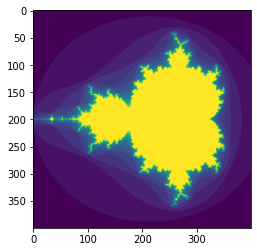

In [28]:
def mandelbrot(h, w, maxit=20):
    y, x = np.ogrid[-1.4:1.4:h*1j, -2:0.8:w*1j]
    c = x + y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2
        div_now = diverge & (divtime == maxit)
        divtime[div_now] = i
        z[diverge] = 2
    
    return divtime

plt.imshow(mandelbrot(400, 400))

### ix_()

In [29]:
a = np.array([2, 3, 4, 5])
b = np.array([8, 5, 4])
c = np.array([5, 4, 6, 8, 3])
ax, bx, cx = np.ix_(a, b, c)

In [30]:
ax

array([[[2]],

       [[3]],

       [[4]],

       [[5]]])

In [31]:
bx

array([[[8],
        [5],
        [4]]])

In [33]:
cx

array([[[5, 4, 6, 8, 3]]])

In [34]:
ax.shape, bx.shape, cx.shape

((4, 1, 1), (1, 3, 1), (1, 1, 5))

In [35]:
result = ax + bx * cx
result

array([[[42, 34, 50, 66, 26],
        [27, 22, 32, 42, 17],
        [22, 18, 26, 34, 14]],

       [[43, 35, 51, 67, 27],
        [28, 23, 33, 43, 18],
        [23, 19, 27, 35, 15]],

       [[44, 36, 52, 68, 28],
        [29, 24, 34, 44, 19],
        [24, 20, 28, 36, 16]],

       [[45, 37, 53, 69, 29],
        [30, 25, 35, 45, 20],
        [25, 21, 29, 37, 17]]])